In [238]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go

plt.rcParams['figure.figsize'] = 17, 12

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [239]:
pyo.init_notebook_mode(connected = True)
cf.go_offline()

In [240]:
read_file = pd.read_excel ("Covid_cases_in_India.xlsx")
  
# Write the dataframe object
# into csv file
read_file.to_csv ("Covid_cases_in_India.csv", 
                  index = None,
                  header=True)
    
# read csv file and convert 
# into a dataframe object
df = pd.DataFrame(pd.read_csv("Covid_cases_in_India.csv"))
  
# show the dataframe
df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0


In [241]:
df.drop(['S. No.'],axis = 1, inplace = True)

In [242]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0


In [243]:
df.shape

(26, 5)

In [244]:
df['Total cases'] = df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']

In [245]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30


In [246]:
total_cases = df['Total cases'].sum()
print('Total cases till now in India is:',total_cases)

Total cases till now in India is: 729


In [247]:
df['Active cases'] = df['Total cases']-(df['Cured']+df['Death'])

In [248]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19


cmaps color options

            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

In [249]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [250]:
total_active_cases = df.groupby('Name of State / UT')['Active cases'].sum().sort_values(ascending = False).to_frame()

In [251]:
total_active_cases

,Active cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [252]:
total_active_cases.style.background_gradient(cmap='Blues')

,Active cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


## Graphical Representation

<AxesSubplot:xlabel='Name of State / UT'>

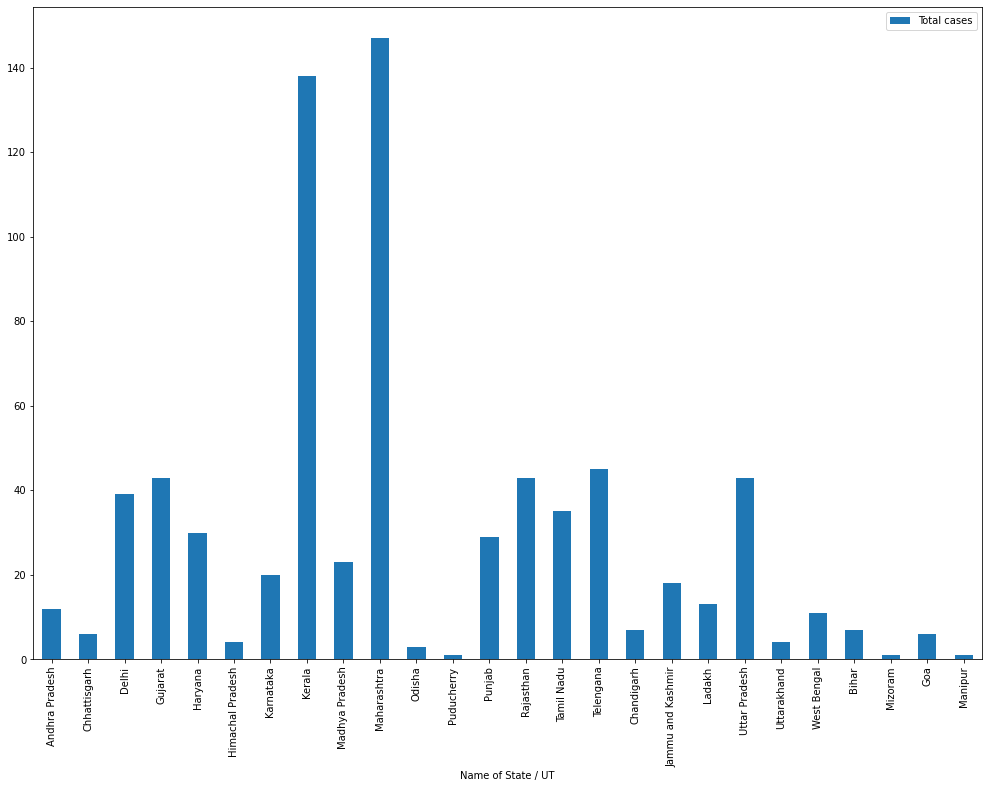

In [253]:
#Using pandas
df.plot(kind = 'bar', x = 'Name of State / UT', y = 'Total cases')

<BarContainer object of 26 artists>

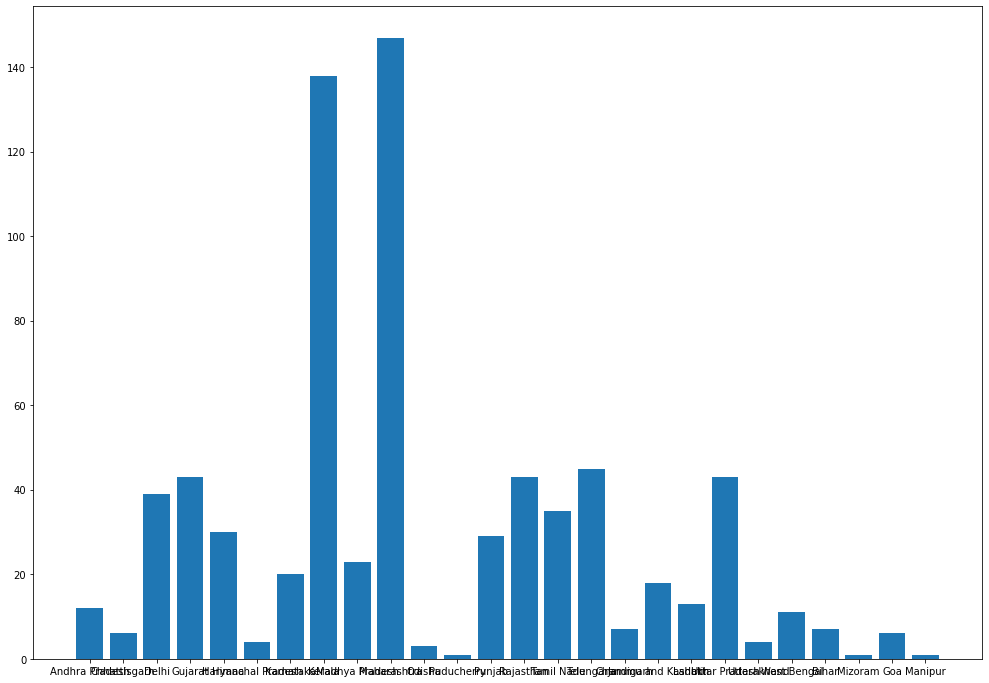

In [254]:
#Using Matplotlib
plt.bar(df['Name of State / UT'],df['Total cases'])

In [255]:
#Plotly
df.iplot(kind = 'bar', x = 'Name of State / UT', y = 'Total cases')

In [256]:
#Using plotly.express
px.bar(df, x = 'Name of State / UT', y = 'Total cases')

<AxesSubplot:xlabel='Name of State / UT', ylabel='Total cases'>

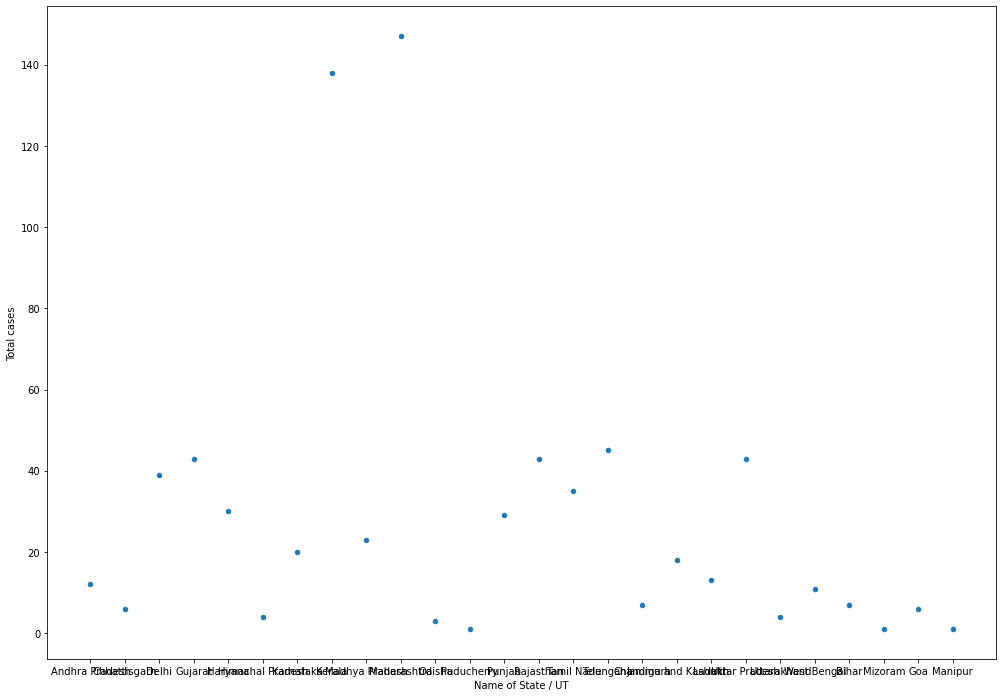

In [257]:
#Pandas
df.plot(kind='scatter',x = 'Name of State / UT', y = 'Total cases')

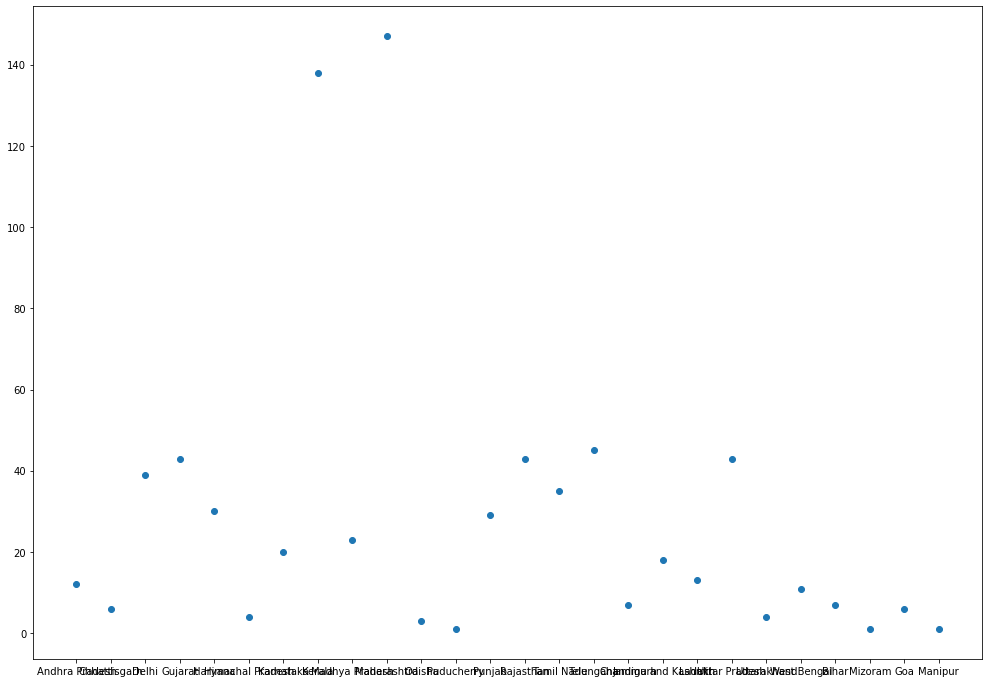

In [258]:
#Matplotlib
plt.scatter(df['Name of State / UT'], df['Total cases'])

In [259]:
#Pandas
df.iplot(kind='scatter',x = 'Name of State / UT', y = 'Total cases',mode='markers+lines',title='My Graph',xTitle='Name of State / UT',yTitle = 'Total cases')

In [260]:
#Using PLotly.express
px.scatter(df,x = 'Name of State / UT', y = 'Total cases')

## Object oriented visulization


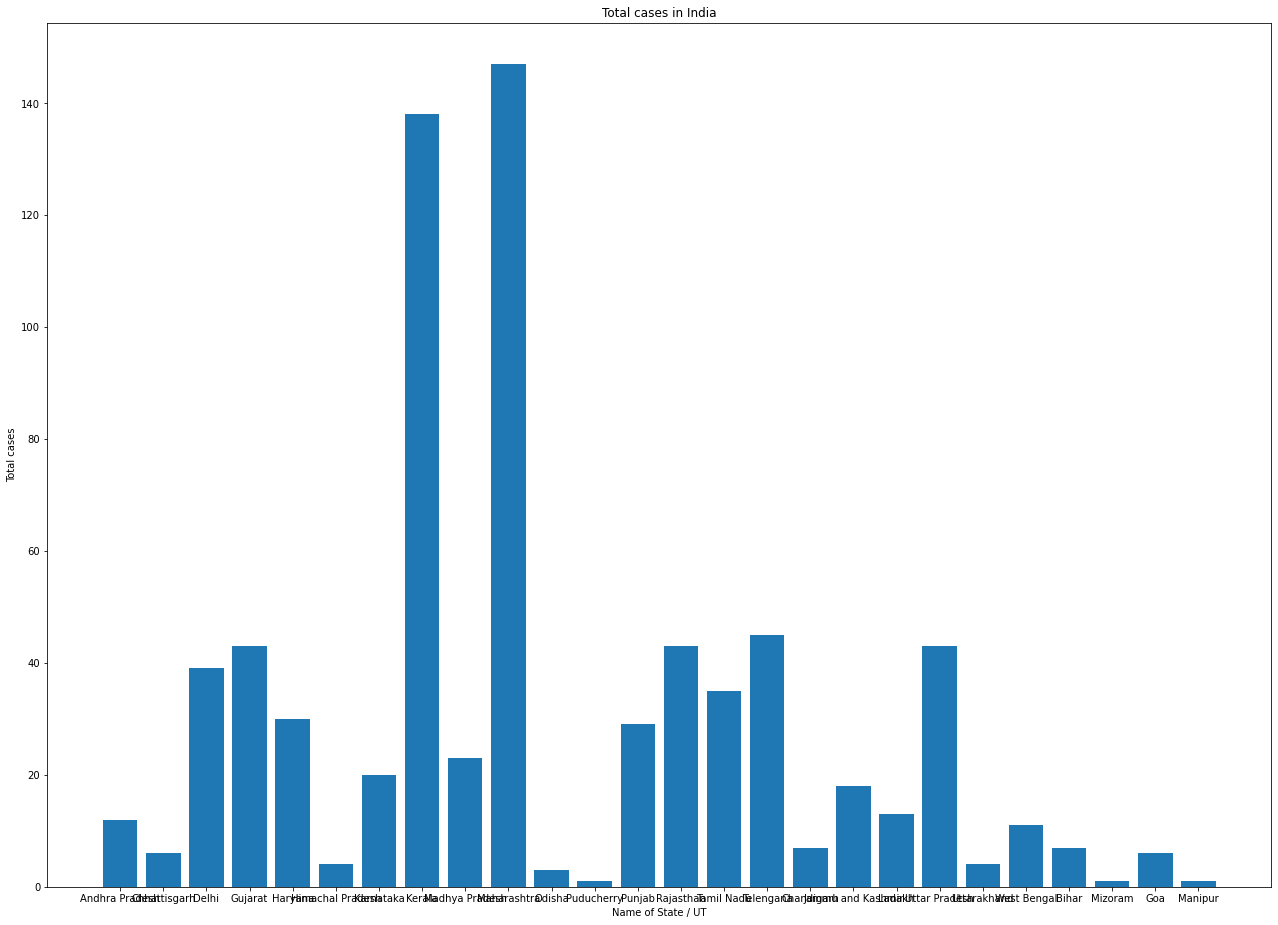

In [261]:
#Matplotlib
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'], df['Total cases'])
axes.set_title("Total cases in India")
axes.set_xlabel('Name of State / UT')
axes.set_ylabel('Total cases')
plt.show()

In [262]:
#Using  plotly.graph

fig = go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y = df['Total cases']))
fig.update_layout(title='Total cases in India',xaxis=dict(title = 'Name of State / UT'),yaxis = dict(title = 'Total Cases'))

In [263]:
indian_locations = pd.read_excel(r"Indian Coordinates.xlsx")

In [264]:
indian_locations.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [265]:
df_full = pd.merge(indian_locations,df,on='Name of State / UT')
df_full.head()

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Active cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127


In [266]:
map = folium.Map(location=[20,70],zoom_start=4,titles = 'Stamenterrian')

for lat,long,value, name in zip(df_full['Latitude'], df_full['Longitude'],df_full['Total cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius = value*0.5,popup = ('<strong>State</strong>:'+str(name).capitalize()+'<br>'
                                                               '<strong>Total Cases</strong>:'+str(value)+'<br>'),color = 'red',
                        fill_color='red',fill_opacity=0.3).add_to(map)

In [267]:
map

## How Corona Virus is Rising Globally

In [268]:
data_india = pd.read_excel(r"per_day_cases.xlsx",parse_dates=True,sheet_name = "India")
data_italy = pd.read_excel(r"per_day_cases.xlsx",parse_dates=True,sheet_name = "Italy")
data_wuhan = pd.read_excel(r"per_day_cases.xlsx",parse_dates=True,sheet_name = "Wuhan")
data_korea = pd.read_excel(r"per_day_cases.xlsx",parse_dates=True,sheet_name = "Korea")

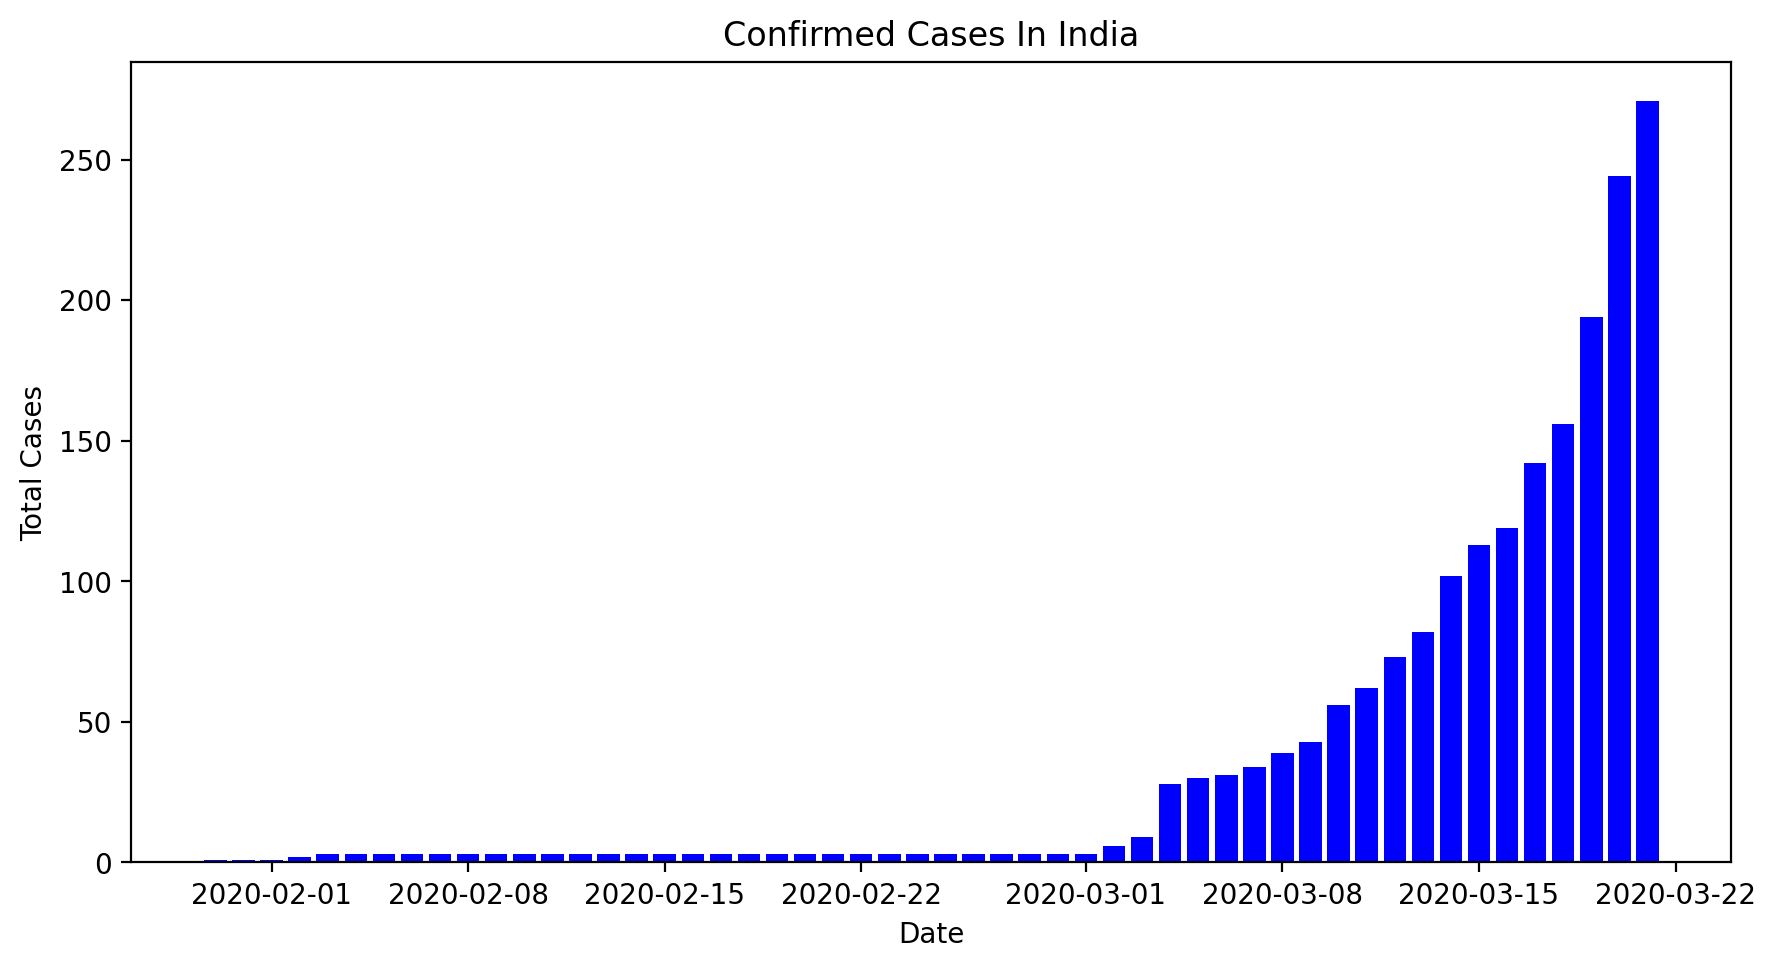

In [269]:
#matplotlib
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(data_india['Date'],data_india['Total Cases'],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed Cases In India")
plt.show()

In [270]:
#Plotly
fig = px.bar(data_india, x = 'Date',y = 'Total Cases',color='Total Cases',title = 'Confirmed cases in India')
fig.show()

In [271]:
fig = px.bar(data_korea, x = 'Date',y = 'Total Cases',color='Total Cases',title = 'Confirmed cases in India')
fig.show()

fig = px.bar(data_wuhan, x = 'Date',y = 'Total Cases',color='Total Cases',title = 'Confirmed cases in India')
fig.show()

fig = px.bar(data_italy, x = 'Date',y = 'Total Cases',color='Total Cases',title = 'Confirmed cases in India')
fig.show()



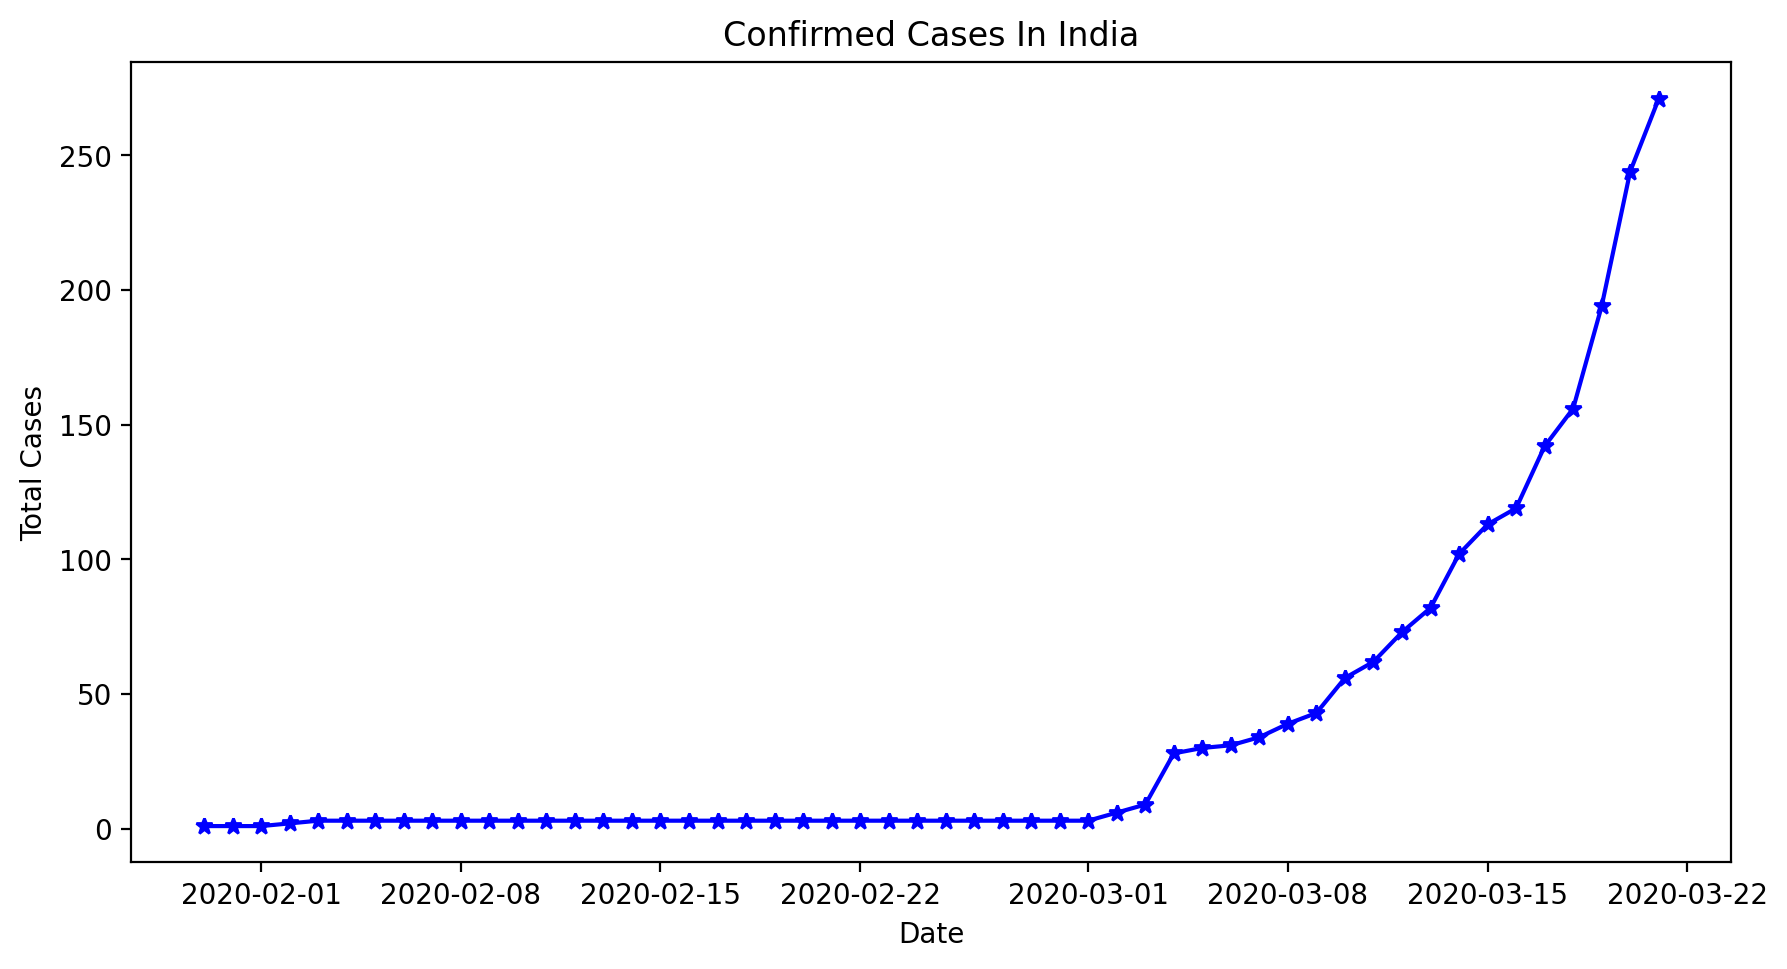

In [272]:
#matplotlib
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(data_india['Date'],data_india['Total Cases'],color='blue',marker = '*')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed Cases In India")
plt.show()

#plotly
fig = px.scatter(data_india,x = 'Date',y = 'Total Cases',color = 'Total Cases',title = "Confirmed Cases In India")
fig.show()

In [273]:
data_india.iplot(kind = 'scatter',x = 'Date',y = 'Total Cases',mode = 'lines+markers')

In [274]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data_india['Date'],y = data_india['Total Cases'],mode = 'lines+markers'))

## Cumulative cases in India,S.korea,Wuhan,Italy

In [275]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],
           [{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))

fig.add_trace(go.Bar(x=data_korea['Date'], y=data_korea['Total Cases'],
                    marker=dict(color=data_korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=data_italy['Date'], y=data_italy['Total Cases'],
                    marker=dict(color=data_italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=data_india['Date'], y=data_india['Total Cases'],
                    marker=dict(color=data_india['Total Cases'], coloraxis="coloraxis")),2, 1)

fig.add_trace(go.Bar(x=data_wuhan['Date'], y=data_wuhan['Total Cases'],
                    marker=dict(color=data_wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [276]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],
           [{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))

fig.add_trace(go.Scatter(x=data_korea['Date'], y=data_korea['Total Cases'],
                    marker=dict(color=data_korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Scatter(x=data_italy['Date'], y=data_italy['Total Cases'],
                    marker=dict(color=data_italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Scatter(x=data_india['Date'], y=data_india['Total Cases'],
                    marker=dict(color=data_india['Total Cases'], coloraxis="coloraxis")),2, 1)

fig.add_trace(go.Scatter(x=data_wuhan['Date'], y=data_wuhan['Total Cases'],
                    marker=dict(color=data_wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show() 

# world coronavirus analysis

In [277]:
import requests
url = 'https://raw.githubusercontent.com/mona2401/COVID-19-Time-Series-Forecasting-with-Data-Analysis/master/covid_19_data.csv'
res = requests.get(url, allow_redirects=True)
with open('covid_19_data.csv','wb') as file:
    file.write(res.content)
df = pd.read_csv('covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [278]:
df.rename(columns = {'ObservationDate':'Date','Province/State':'state','Country/Region':'country'},inplace = True)

In [279]:
df.head()

,SNo,Date,state,country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [280]:
df.query('country=="India"')

,SNo,Date,state,country,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,1/30/20 16:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
740,741,02/04/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
810,811,02/05/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
881,882,02/06/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
954,955,02/07/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
1026,1027,02/08/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0


In [281]:
df.groupby('Date').sum()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
01/27/2020,12342,2927.0,82.0,61.0
01/28/2020,15262,5578.0,131.0,107.0
01/29/2020,18711,6165.0,133.0,126.0
01/30/2020,23345,8235.0,171.0,143.0


In [282]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
death = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [283]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = confirmed['Date'],y = confirmed['Confirmed'],mode = 'lines+markers',name = 'Confirmed',
                         line = dict(color = 'blue',width = 2)))

fig.add_trace(go.Scatter(x = death['Date'],y = death['Deaths'],mode = 'lines+markers',name = 'Deaths',
                         line = dict(color = 'red',width = 2)))

fig.add_trace(go.Scatter(x = recovered['Date'],y = recovered['Recovered'],mode = 'lines+markers',name = 'Recovered',
                         line = dict(color = 'green',width = 2)))

In [288]:
import requests
url = 'https://raw.githubusercontent.com/mona2401/COVID-19-Time-Series-Forecasting-with-Data-Analysis/master/time_series_covid_19_confirmed.csv'
res = requests.get(url, allow_redirects=True)
with open('time_series_covid_19_confirmed.csv','wb') as file:
    file.write(res.content)
df_confirmed = pd.read_csv('time_series_covid_19_confirmed.csv')

In [289]:
df_confirmed.rename(columns = {'Province/State':'state','Country/Region':'country'},inplace = True)

In [290]:
df_confirmed.head()

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [291]:
df_latlong = pd.merge(df,df_confirmed, on = ['country','state'])

In [293]:
df_latlong.head()

,SNo,Date,state,country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,70,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
2,118,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
3,159,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
4,203,01/26/2020,Washington,US,1/26/20 16:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572


In [301]:
fig = px.density_mapbox(df_latlong,lat = "Lat",lon = "Long", hover_name = "state", hover_data = ["Confirmed","Deaths","Recovered"],animation_frame = "Date",color_continuous_scale = "Portland",radius = 7, zoom = 0,height = 700)
fig.update_layout(title = 'Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style = "open-street-map",mapbox_center_lon = 0)
fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})